In [1]:
import os
import subprocess
import cv2
import matplotlib.pyplot as plt

In [2]:
''' directories and file names '''
thermal_train_dir = '../dataset/images_thermal_train'
thermal_val_dir = '../dataset/images_thermal_val'
thermal_test_dir = '../dataset/video_thermal_test'
rgb_train_dir = '../dataset/images_rgb_train'
rgb_val_dir = '../dataset/images_rgb_val'
rgb_test_dir = '../dataset/video_rgb_test'

thermal_train_txt = 'annotations_thermal_train' 
thermal_val_txt = 'annotations_thermal_val'
thermal_test_txt = 'annotations_thermal_test'
rgb_train_txt = 'annotations_rgb_train' 
rgb_val_txt = 'annotations_rgb_val' 
rgb_test_txt = 'annotations_rgb_test' 

In [3]:
command = f"python generate_labels.py --json-path={thermal_train_dir} --name={thermal_train_txt}"
subprocess.run(command, shell = True)

command = f"python generate_labels.py --json-path={thermal_val_dir} --name={thermal_val_txt}"
subprocess.run(command, shell = True)

command = f"python generate_labels.py --json-path={thermal_test_dir} --name={thermal_test_txt}"
subprocess.run(command, shell = True)

command = f"python generate_labels.py --json-path={rgb_train_dir} --name={rgb_train_txt}"
subprocess.run(command, shell = True)

command = f"python generate_labels.py --json-path={rgb_val_dir} --name={rgb_val_txt}"
subprocess.run(command, shell = True)

command = f"python generate_labels.py --json-path={rgb_test_dir} --name={rgb_test_txt}"
subprocess.run(command, shell = True)

CompletedProcess(args='python generate_labels.py --json-path=../dataset/video_rgb_test --name=annotations_rgb_test', returncode=0)

['2', '2', '2', '5', '5', '2', '2', '2', '5', '2', '2', '2', '2', '2', '5', '2']


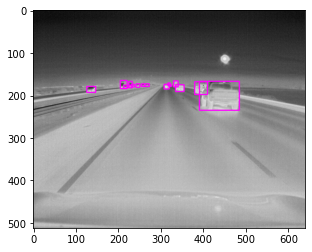

In [6]:
''' check '''

txt_file = os.path.join('annotations', thermal_test_txt + '.txt') 

fnames = []
boxes = []
labels = []
with open(txt_file, 'r') as f:         
    lines  = f.readlines()
    #
    for line in lines:
        if not line.startswith('#'):
            splited = line.strip().split()
            fnames.append(splited[0])
            num_boxes = (len(splited) - 1) // 7
            box = []
            label = []
            for i in range(num_boxes):
                '''coordinates'''
                x = int(splited[3 + 7 * i])
                y = int(splited[4 + 7 * i])
                x2 = int(splited[5 +  7* i])
                y2 = int(splited[6 + 7 * i])
                '''class'''
                c = splited[7 + 7 * i]
                box.append([x, y, x2, y2])
                label.append(c)
                #
            boxes.append(box)           
            labels.append(label)   
            
idx = 3000
img = cv2.imread(os.path.join(thermal_test_dir, 'data', fnames[idx]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
box = boxes[idx]
label = labels[idx]

for b in box:
    pt1 = (b[0], b[1])
    pt2 = (b[2], b[3])
    cv2.rectangle(img, pt1 = pt1, pt2 = pt2,color = (255,0,255), thickness = 2)
print(label)
plt.imshow(img)